In [1]:
import polars as pl
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from utils import fraud_ratio

pl.Config.set_tbl_rows(999999)
pl.Config.set_tbl_cols(999999)
pl.Config.set_fmt_str_lengths(500)

polars.config.Config

In [2]:
trans_df = pl.read_csv("data/credit_card_transactions-ibm_v2.csv")

In [ ]:
trans_df.head()

User,Card,Year,Month,Day,Time,Amount,Use Chip,Merchant Name,Merchant City,Merchant State,Zip,MCC,Errors?,Is Fraud?
i64,i64,i64,i64,i64,str,str,str,i64,str,str,f64,i64,str,str
0,0,2002,9,1,"""06:21""","""$134.09""","""Swipe Transaction""",3527213246127876953,"""La Verne""","""CA""",91750.0,5300,null,"""No"""
0,0,2002,9,1,"""06:42""","""$38.48""","""Swipe Transaction""",-727612092139916043,"""Monterey Park""","""CA""",91754.0,5411,null,"""No"""
0,0,2002,9,2,"""06:22""","""$120.34""","""Swipe Transaction""",-727612092139916043,"""Monterey Park""","""CA""",91754.0,5411,null,"""No"""
0,0,2002,9,2,"""17:45""","""$128.95""","""Swipe Transaction""",3414527459579106770,"""Monterey Park""","""CA""",91754.0,5651,null,"""No"""
0,0,2002,9,3,"""06:23""","""$104.71""","""Swipe Transaction""",5817218446178736267,"""La Verne""","""CA""",91750.0,5912,null,"""No"""


In [4]:
trans_df.select(pl.all().is_null().sum())

User,Card,Year,Month,Day,Time,Amount,Use Chip,Merchant Name,Merchant City,Merchant State,Zip,MCC,Errors?,Is Fraud?
u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32
0,0,0,0,0,0,0,0,0,0,2720821,2878135,0,23998469,0


In [5]:
trans_df.select(pl.all().n_unique())

User,Card,Year,Month,Day,Time,Amount,Use Chip,Merchant Name,Merchant City,Merchant State,Zip,MCC,Errors?,Is Fraud?
u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32
2000,9,30,12,31,1440,98953,3,100343,13429,224,27322,109,24,2


In [9]:
trans_df["Is Fraud?"].value_counts()

Is Fraud?,count
str,u32
"""No""",24357143
"""Yes""",29757


In [3]:
trans_rename_dict = {
    'Use Chip': 'Use_Chip',
    'Merchant Name': 'Merchant_Name',
    'Merchant City': 'Merchant_City',
    'Merchant State': 'Merchant_State',
    'Errors?': 'Errors',
    'Is Fraud?': 'Is_Fraud'
}
trans_df = trans_df.rename(trans_rename_dict)

trans_df = trans_df.with_columns([
    pl.when(pl.col("Is_Fraud") == "Yes")
      .then(pl.lit(1))
      .otherwise(pl.lit(0))
      .alias("Is_Fraud")
])

trans_df = trans_df.with_columns([
    pl.col("Amount").str.replace(r"\$", "").cast(pl.Float64)
])

trans_df = trans_df.with_columns([
    pl.col("Time").str.slice(0, 2).cast(pl.Int64).alias("Hour"),
    pl.col("Time").str.slice(3, 2).cast(pl.Int64).alias("Minute")
])
trans_df = trans_df.with_columns([
    pl.datetime("Year", "Month", "Day", "Hour", "Minute")
      .alias("Datetime")
])
trans_df = trans_df.with_columns([
    pl.col("Datetime").dt.weekday().alias("Weekday")
])

trans_df = trans_df.with_columns([
    pl.col("Zip").cast(pl.Int64)   
])

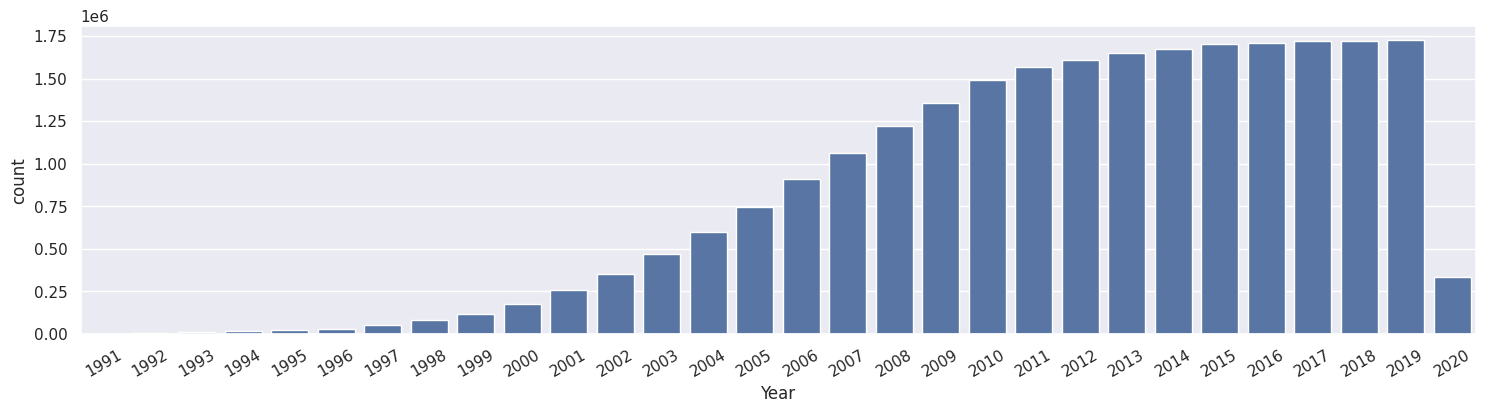

In [4]:
sns.set_theme()
plt.figure(figsize=(18, 4))
sns.countplot(data=trans_df, x="Year")
plt.xticks(rotation=30)
plt.show()

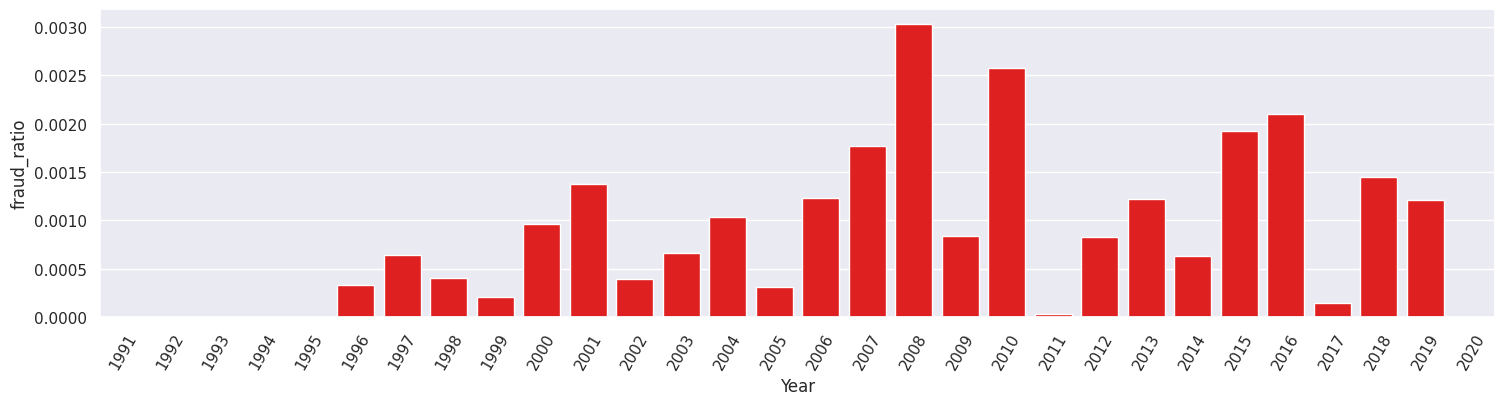

In [ ]:
count_pd = fraud_ratio(trans_df, "Year")

plt.figure(figsize=(18, 4))
sns.barplot(data=count_pd, x="Year", y="fraud_ratio", color="red")
plt.xticks(rotation=30)
plt.savefig(f'log/year.png', dpi=300, bbox_inches='tight')
plt.show()

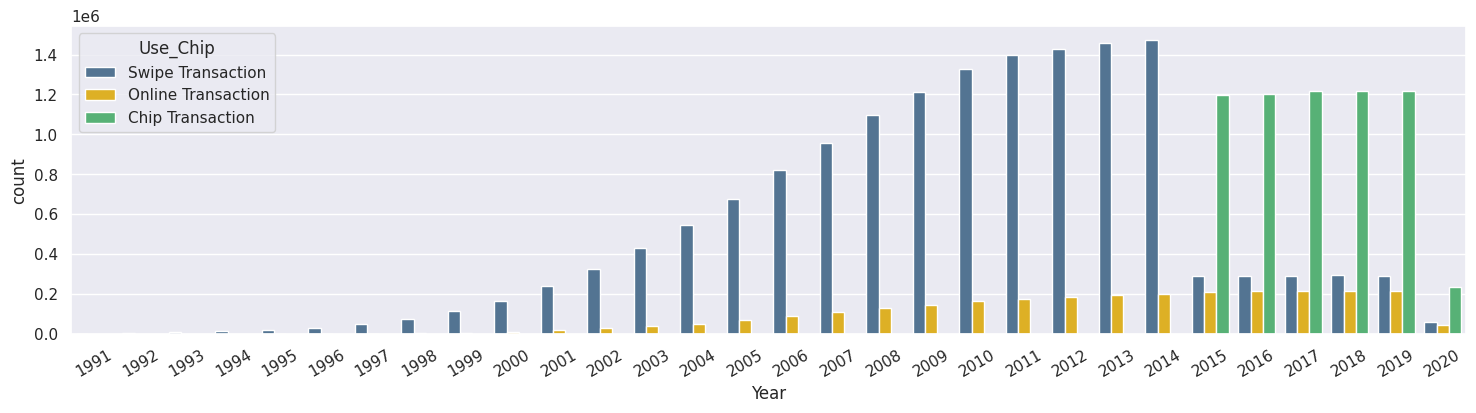

In [ ]:
plt.figure(figsize=(18, 4))
sns.countplot(data=trans_df, x="Year", hue="Use_Chip",
    palette={
        "Online Transaction": "#fcc006",
        "Chip Transaction": "#48c072",
        "Swipe Transaction": "#49759c"
    })
plt.xticks(rotation=30)
plt.show()

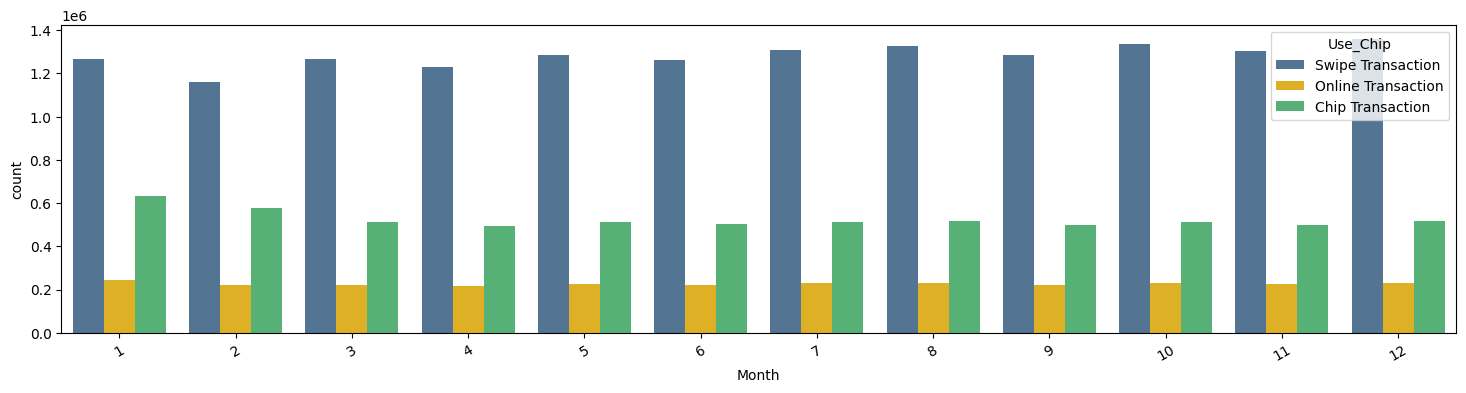

In [ ]:
plt.figure(figsize=(18, 4))
sns.countplot(data=trans_df, x="Month", hue="Use_Chip",
    palette={
        "Online Transaction": "#fcc006",
        "Chip Transaction": "#48c072",
        "Swipe Transaction": "#49759c"
    })
plt.xticks(rotation=30)
plt.show()

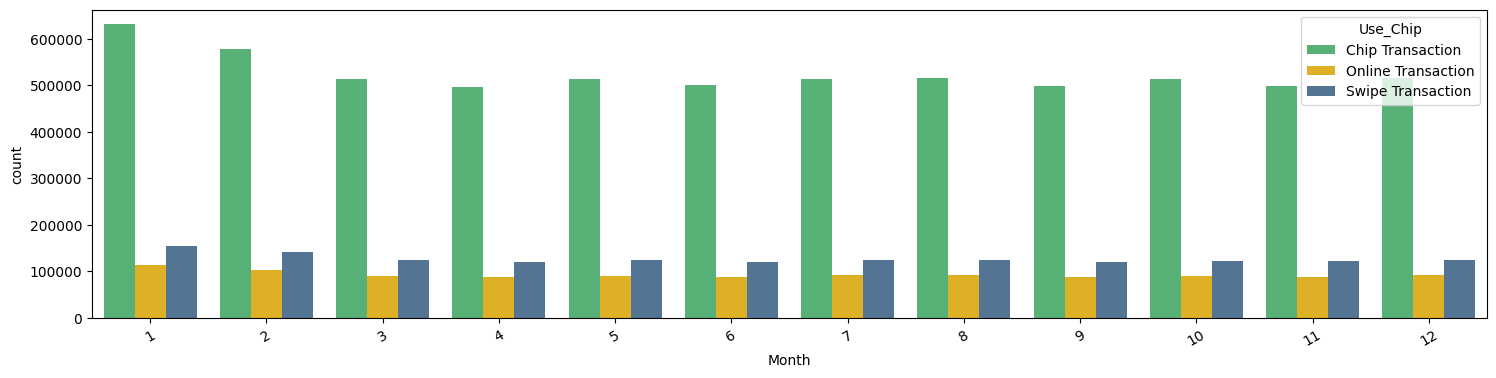

In [5]:
plt.figure(figsize=(18, 4))
sns.countplot(data=trans_df.filter(pl.col("Year") >= 2015), x="Month", hue="Use_Chip",
    palette={
        "Online Transaction": "#fcc006",
        "Chip Transaction": "#48c072",
        "Swipe Transaction": "#49759c"
    })
plt.xticks(rotation=30)
plt.show()

In [5]:
online_df = trans_df.filter(pl.col("Merchant_City") == "ONLINE")

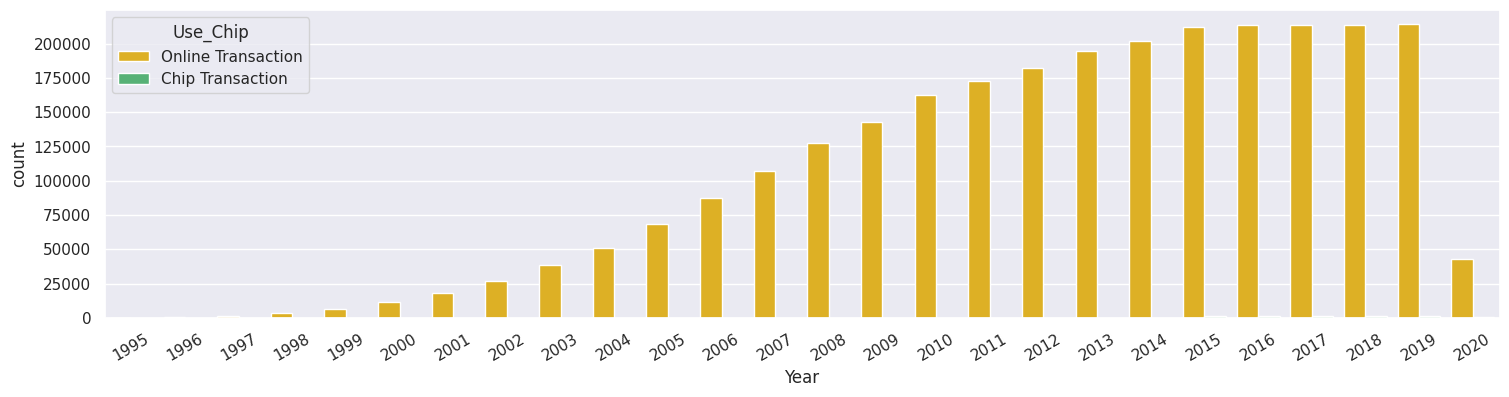

In [6]:
sns.set_theme()
plt.figure(figsize=(18, 4))
sns.countplot(data=online_df, x="Year", hue="Use_Chip",
    palette={
        "Online Transaction": "#fcc006",
        "Chip Transaction": "#48c072"
    })
plt.xticks(rotation=30)
plt.show()

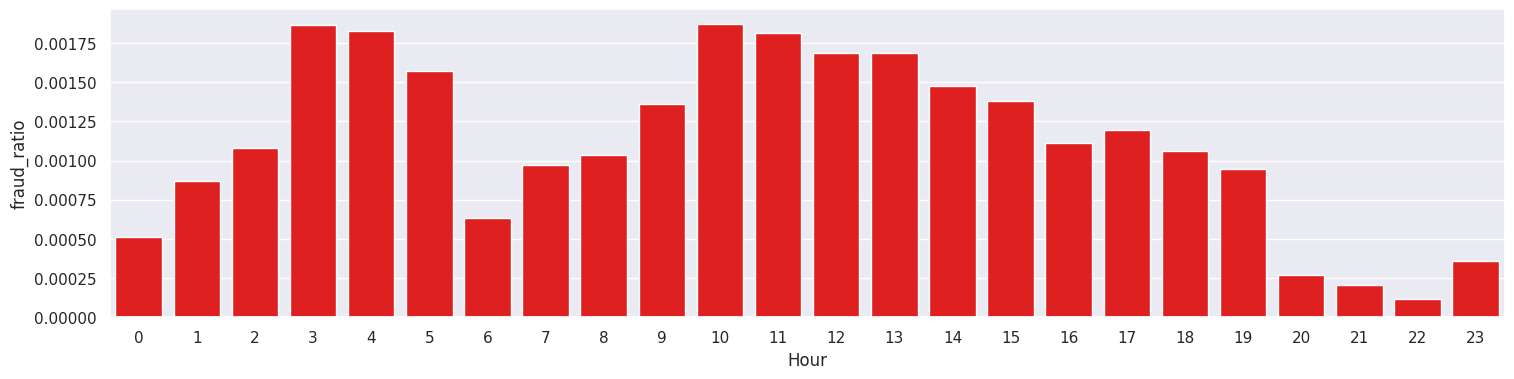

In [13]:
count_pd = fraud_ratio(trans_df, "Hour")

plt.figure(figsize=(18, 4))
sns.barplot(data=count_pd, x="Hour", y="fraud_ratio", color="red")
plt.savefig(f'log/hour.png', dpi=300, bbox_inches='tight')
plt.show()

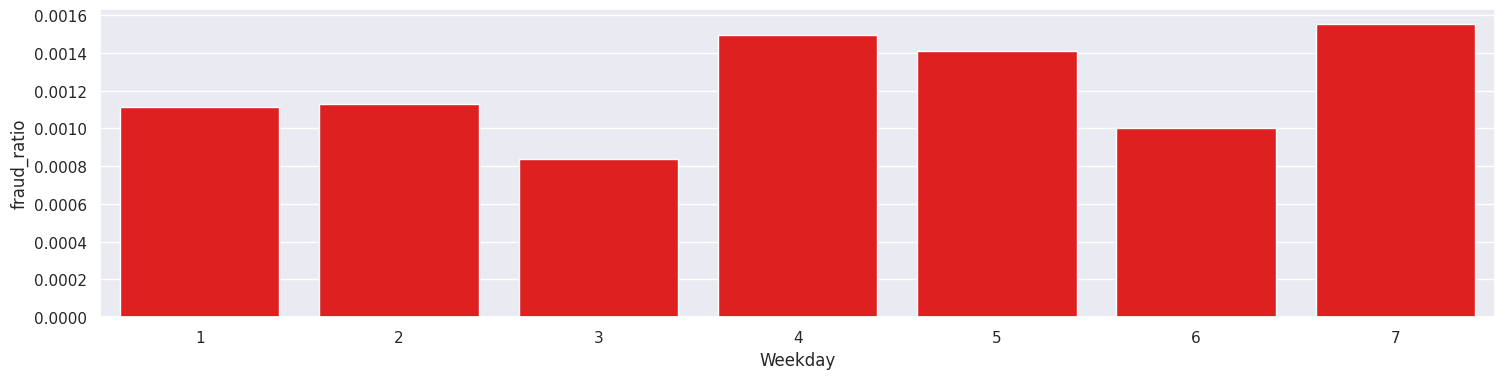

In [14]:
count_pd = fraud_ratio(trans_df, "Weekday")

plt.figure(figsize=(18, 4))
sns.barplot(data=count_pd, x="Weekday", y="fraud_ratio", color="red")
plt.savefig(f'log/weekday.png', dpi=300, bbox_inches='tight')
plt.show()

In [6]:
trans_df = trans_df.with_columns([
    (pl.col("Datetime") - pl.col("Datetime").shift(1)).over(["User", "Card"]).alias("Diff_Berfore_Trans_Time")
])
trans_df = trans_df.with_columns([
    (pl.col("Diff_Berfore_Trans_Time").dt.total_seconds() / 60).fill_null(-1).cast(pl.Int32).alias("Diff_Berfore_Trans_Time_Min")
])

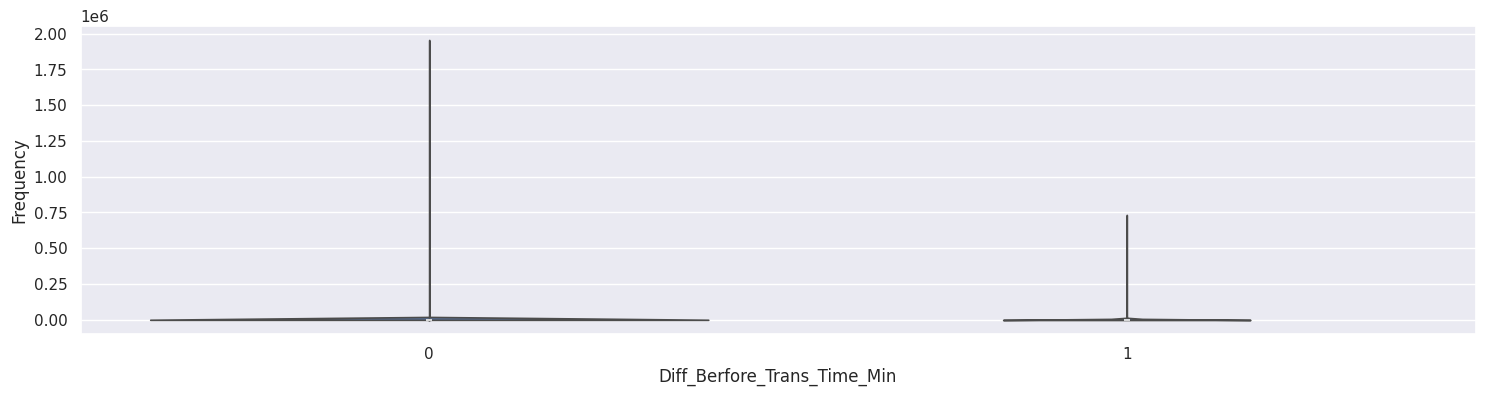

In [7]:
df = trans_df.select(["Diff_Berfore_Trans_Time_Min", "Is_Fraud"]).to_pandas()

plt.figure(figsize=(18, 4))
sns.violinplot(y = df["Diff_Berfore_Trans_Time_Min"], x = df["Is_Fraud"])
plt.xlabel("Diff_Berfore_Trans_Time_Min")
plt.ylabel("Frequency")
plt.show()

In [6]:
trans_df = trans_df.with_columns([   
    pl.when((pl.col("Merchant_City") != pl.col("Merchant_City").shift(1)).over(["User", "Card"]))
      .then(pl.lit(0))
      .otherwise(pl.lit(1))
      .alias("Before_City_Match"),
      
    pl.when((pl.col("Merchant_State") != pl.col("Merchant_State").shift(1)).over(["User", "Card"]))
      .then(pl.lit(0))
      .otherwise(pl.lit(1))
      .alias("Before_State_Match"),
      
    pl.when((pl.col("Zip") != pl.col("Zip").shift(1)).over(["User", "Card"]))
      .then(pl.lit(0))
      .otherwise(pl.lit(1))
      .alias("Before_Zip_Match")
])

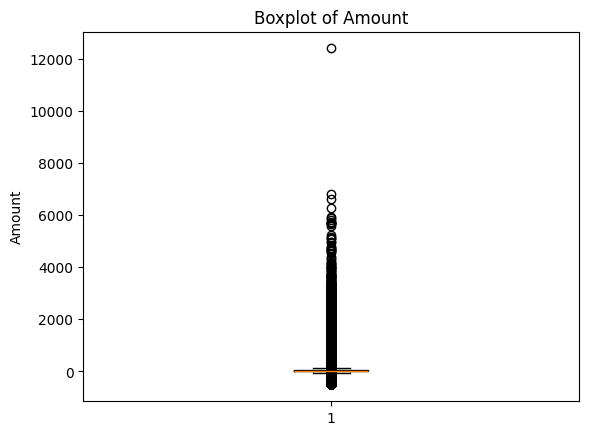

In [ ]:
plt.boxplot(trans_df['Amount'].to_pandas())
plt.title('Boxplot of Amount')
plt.ylabel('Amount')
plt.show()

In [ ]:
def grou_by_rolling(df, period):
    df_ = (
        df.rolling(
            "Datetime",
            group_by=["User", "Card"],        # 그룹 기준
            period=period,                # 과거 24시간 윈도우
        )
        .agg([
            pl.count().alias(f"Count_{period}"),           # 과거 24h 거래 개수
            pl.col("Amount").max().alias(f"Amount_Max_{period}"), # 과거 24h 거래 금액 합계
            pl.col("Amount").mean().alias(f"Amount_Mean_{period}")# 과거 24h 거래 금액 평균
        ])
    )
    return df_

df_24h = grou_by_rolling(trans_df, "24h")
df_7d = grou_by_rolling(trans_df, "7d")
df_30d = grou_by_rolling(trans_df, "30d")

df_agg_mer = (
    trans_df
    .group_by("Merchant_Name")
    .agg([
        pl.col("Amount").max().alias("Amount_Max_Merchant"),
        pl.col("Amount").mean().alias("Amount_Mean_Merchant")
    ])
)
df_agg_mcc = (
    trans_df
    .group_by("MCC")
    .agg([
        pl.col("Amount").max().alias("Amount_Max_MCC"),
        pl.col("Amount").mean().alias("Amount_Mean_MCC")
    ])
)

trans_df = (
    trans_df
    .join(df_24h, on=["User", "Card", "Datetime"], how="left")
    .join(df_7d, on=["User", "Card", "Datetime"], how="left")
    .join(df_30d, on=["User", "Card", "Datetime"], how="left")
    .join(df_agg_mer, on=["Merchant_Name"], how='left')
    .join(df_agg_mcc, on=["Merchant_Name"], how='left')
)

/tmp/ipykernel_60630/2292358881.py:9: DeprecationWarning: `pl.count()` is deprecated. Please use `pl.len()` instead.
  pl.count().alias(f"Count_{period}"),           # 과거 24h 거래 개수


In [ ]:
df_agg = (
    trans_df
    .group_by("Merchant_Name")
    .agg([
        pl.col("Amount").max().alias("Amount_Max_Merchant"),
        pl.col("Amount").mean().alias("Amount_Mean_Merchant")
    ]),
    trans_df
    .group_by("MCC")
    .agg([
        pl.col("Amount").max().alias("Amount_Max_MCC"),
        pl.col("Amount").mean().alias("Amount_Mean_MCC")
    ])
)

trans_df = (
    trans_df
    .join(df_24h, on=["User", "Card", "Datetime"], how="left")
    .join(df_7d, on=["User", "Card", "Datetime"], how="left")
    .join(df_30d, on=["User", "Card", "Datetime"], how="left")
)

In [9]:
df_agg = (
    trans_df
    .group_by("Merchant_Name")
    .agg([
        pl.col("Amount").max().alias("Amount_Max_Merchant"),
        pl.col("Amount").mean().alias("Amount_Mean_Merchant")
    ]),
    trans_df
    .group_by("MCC")
    .agg([
        pl.col("Amount").max().alias("Amount_Max_MCC"),
        pl.col("Amount").mean().alias("Amount_Mean_MCC")
    ])
)

In [8]:
trans_df = trans_df.with_columns(
    pl.when(pl.col("Merchant_State").is_null())
      .then(pl.lit("ONLINE"))
      .when(pl.col("Zip").is_null())
      .then(pl.lit("ABROAD"))
      .otherwise(pl.col("Merchant_State"))
      .alias("Merchant_State_New")
)

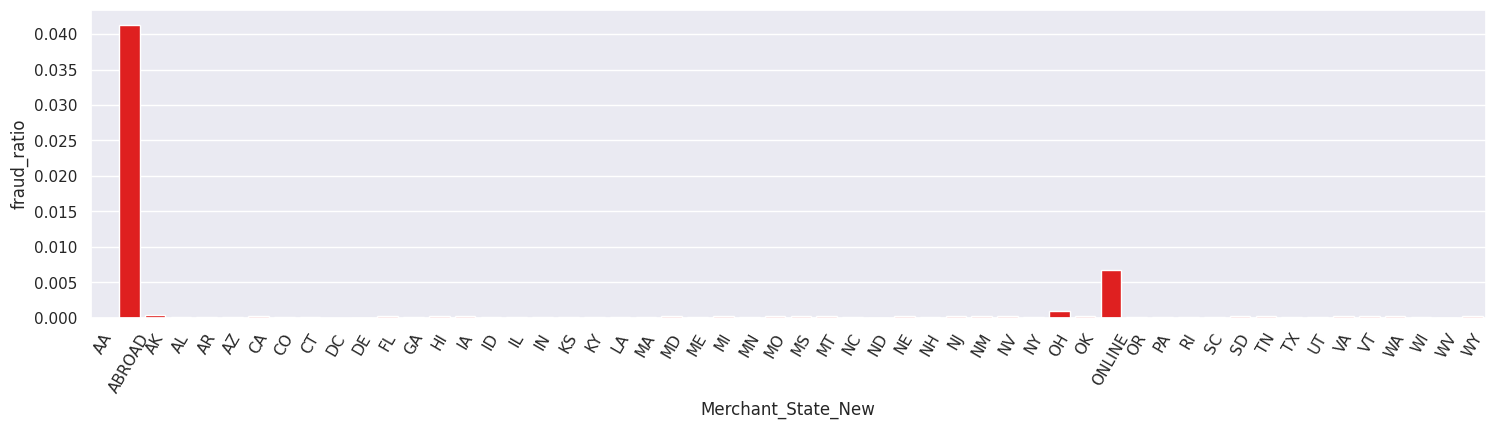

In [9]:
count_pd = fraud_ratio(trans_df, "Merchant_State_New")

plt.figure(figsize=(18, 4))
sns.barplot(data=count_pd, x="Merchant_State_New", y="fraud_ratio", color="red")
plt.xticks(rotation=60)
plt.savefig(f'log/fr.png', dpi=300, bbox_inches='tight')
plt.show()

In [15]:
unique_errors = [
    "Bad Zipcode",
    "Bad Card Number",
    "Bad Expiration",
    "Bad CVV",
    "Insufficient Balance",
    "Technical Glitch",
    "Bad PIN"
]

trans_df = trans_df.with_columns(
    [
        pl.when(
            pl.col("Errors").fill_null("").str.contains(error, literal=True)
        )
        .then(pl.lit(1))
        .otherwise(pl.lit(0))
        .alias(error.replace(" ", "_"))
        for error in unique_errors
    ]
)

In [6]:
user_df = pl.read_csv("data/sd254_users.csv")
print(user_df.height)
user_df.head()

2000


Person,Current Age,Retirement Age,Birth Year,Birth Month,Gender,Address,Apartment,City,State,Zipcode,Latitude,Longitude,Per Capita Income - Zipcode,Yearly Income - Person,Total Debt,FICO Score,Num Credit Cards
str,i64,i64,i64,i64,str,str,i64,str,str,i64,f64,f64,str,str,str,i64,i64
"""Hazel Robinson""",53,66,1966,11,"""Female""","""462 Rose Lane""",null,"""La Verne""","""CA""",91750,34.15,-117.76,"""$29278""","""$59696""","""$127613""",787,5
"""Sasha Sadr""",53,68,1966,12,"""Female""","""3606 Federal Boulevard""",null,"""Little Neck""","""NY""",11363,40.76,-73.74,"""$37891""","""$77254""","""$191349""",701,5
"""Saanvi Lee""",81,67,1938,11,"""Female""","""766 Third Drive""",null,"""West Covina""","""CA""",91792,34.02,-117.89,"""$22681""","""$33483""","""$196""",698,5
"""Everlee Clark""",63,63,1957,1,"""Female""","""3 Madison Street""",null,"""New York""","""NY""",10069,40.71,-73.99,"""$163145""","""$249925""","""$202328""",722,4
"""Kyle Peterson""",43,70,1976,9,"""Male""","""9620 Valley Stream Drive""",null,"""San Francisco""","""CA""",94117,37.76,-122.44,"""$53797""","""$109687""","""$183855""",675,1


In [7]:
user_df.select(pl.all().is_null().sum())

Person,Current Age,Retirement Age,Birth Year,Birth Month,Gender,Address,Apartment,City,State,Zipcode,Latitude,Longitude,Per Capita Income - Zipcode,Yearly Income - Person,Total Debt,FICO Score,Num Credit Cards
u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32
0,0,0,0,0,0,0,1472,0,0,0,0,0,0,0,0,0,0


In [8]:
user_df.select(pl.all().n_unique())

Person,Current Age,Retirement Age,Birth Year,Birth Month,Gender,Address,Apartment,City,State,Zipcode,Latitude,Longitude,Per Capita Income - Zipcode,Yearly Income - Person,Total Debt,FICO Score,Num Credit Cards
u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32
1993,80,29,80,12,2,1999,200,1286,51,1815,989,1224,1754,1948,1880,321,9


In [9]:
user_rename_dict = {
    'Current Age': 'Current_Age', 
    'Retirement Age': 'Retirement_Age', 
    'Birth Year': 'Birth_Year', 
    'Birth Month': 'Birth_Month', 
    'City': 'User_City', 
    'State': 'User_State', 
    'Zipcode': 'User_Zipcode', 
    'Per Capita Income - Zipcode': 'Per_Capita_Income_Zipcode', 
    'Yearly Income - Person': 'Yearly_Income_Person', 
    'Total Debt': 'Total_Debt', 
    'FICO Score': 'FICO_Score', 
    'Num Credit Cards': 'Num_Credit_Cards'
}

user_df = user_df.rename(user_rename_dict)

user_df = user_df.with_row_index("User")

amount_cols = ["Per_Capita_Income_Zipcode", "Yearly_Income_Person", "Total_Debt"]
user_df = user_df.with_columns([
    pl.col(col).str.replace(r"\$", "").cast(pl.Int64)
    for col in amount_cols
])

user_df.head()

User,Person,Current_Age,Retirement_Age,Birth_Year,Birth_Month,Gender,Address,Apartment,User_City,User_State,User_Zipcode,Latitude,Longitude,Per_Capita_Income_Zipcode,Yearly_Income_Person,Total_Debt,FICO_Score,Num_Credit_Cards
u32,str,i64,i64,i64,i64,str,str,i64,str,str,i64,f64,f64,i64,i64,i64,i64,i64
0,"""Hazel Robinson""",53,66,1966,11,"""Female""","""462 Rose Lane""",null,"""La Verne""","""CA""",91750,34.15,-117.76,29278,59696,127613,787,5
1,"""Sasha Sadr""",53,68,1966,12,"""Female""","""3606 Federal Boulevard""",null,"""Little Neck""","""NY""",11363,40.76,-73.74,37891,77254,191349,701,5
2,"""Saanvi Lee""",81,67,1938,11,"""Female""","""766 Third Drive""",null,"""West Covina""","""CA""",91792,34.02,-117.89,22681,33483,196,698,5
3,"""Everlee Clark""",63,63,1957,1,"""Female""","""3 Madison Street""",null,"""New York""","""NY""",10069,40.71,-73.99,163145,249925,202328,722,4
4,"""Kyle Peterson""",43,70,1976,9,"""Male""","""9620 Valley Stream Drive""",null,"""San Francisco""","""CA""",94117,37.76,-122.44,53797,109687,183855,675,1


In [22]:
user_df = user_df.with_columns(
    pl.when(pl.col("FICO_Score") < 580)
    .then(0)
    .when(pl.col("FICO_Score") < 670)
    .then(1)
    .when(pl.col("FICO_Score") < 740)
    .then(2)
    .when(pl.col("FICO_Score") < 800)
    .then(3)
    .otherwise(4)
    .alias("FICO_Score_Rank")
)

In [ ]:
features = ['User', 'Retirement_Age', 'Birth_Year', 'Birth_Month', 'Gender', 'Apartment', 'User_City', 'User_State', 'User_Zipcode', 'Per_Capita_Income_Zipcode', 'Yearly_Income_Person', 'Total_Debt', 'FICO_Score_Rank', 'Num_Credit_Cards']

user_df = user_df[features]
user_df.write_parquet("data/user_df.parquet")
user_df.head(5)

In [16]:
trans_df = trans_df.join(user_df, on="User", how="left")

In [17]:
trans_df.head()

User,Card,Year,Month,Day,Time,Amount,Use_Chip,Merchant_Name,Merchant_City,Merchant_State,Zip,MCC,Errors,Is_Fraud,Hour,Minute,Datetime,Weekday,Merchant_State_New,Bad_Zipcode,Bad_Card_Number,Bad_Expiration,Bad_CVV,Insufficient_Balance,Technical_Glitch,Bad_PIN,Person,Current_Age,Retirement_Age,Birth_Year,Birth_Month,Gender,Address,Apartment,User_City,User_State,User_Zipcode,Latitude,Longitude,Per_Capita_Income_Zipcode,Yearly_Income_Person,Total_Debt,FICO_Score,Num_Credit_Cards
i64,i64,i64,i64,i64,str,f64,str,i64,str,str,i64,i64,str,i32,i64,i64,datetime[μs],i8,str,i32,i32,i32,i32,i32,i32,i32,str,i64,i64,i64,i64,str,str,i64,str,str,i64,f64,f64,i64,i64,i64,i64,i64
0,0,2002,9,1,"""06:21""",134.09,"""Swipe Transaction""",3527213246127876953,"""La Verne""","""CA""",91750,5300,null,0,6,21,2002-09-01 06:21:00,7,"""CA""",0,0,0,0,0,0,0,"""Hazel Robinson""",53,66,1966,11,"""Female""","""462 Rose Lane""",null,"""La Verne""","""CA""",91750,34.15,-117.76,29278,59696,127613,787,5
0,0,2002,9,1,"""06:42""",38.48,"""Swipe Transaction""",-727612092139916043,"""Monterey Park""","""CA""",91754,5411,null,0,6,42,2002-09-01 06:42:00,7,"""CA""",0,0,0,0,0,0,0,"""Hazel Robinson""",53,66,1966,11,"""Female""","""462 Rose Lane""",null,"""La Verne""","""CA""",91750,34.15,-117.76,29278,59696,127613,787,5
0,0,2002,9,2,"""06:22""",120.34,"""Swipe Transaction""",-727612092139916043,"""Monterey Park""","""CA""",91754,5411,null,0,6,22,2002-09-02 06:22:00,1,"""CA""",0,0,0,0,0,0,0,"""Hazel Robinson""",53,66,1966,11,"""Female""","""462 Rose Lane""",null,"""La Verne""","""CA""",91750,34.15,-117.76,29278,59696,127613,787,5
0,0,2002,9,2,"""17:45""",128.95,"""Swipe Transaction""",3414527459579106770,"""Monterey Park""","""CA""",91754,5651,null,0,17,45,2002-09-02 17:45:00,1,"""CA""",0,0,0,0,0,0,0,"""Hazel Robinson""",53,66,1966,11,"""Female""","""462 Rose Lane""",null,"""La Verne""","""CA""",91750,34.15,-117.76,29278,59696,127613,787,5
0,0,2002,9,3,"""06:23""",104.71,"""Swipe Transaction""",5817218446178736267,"""La Verne""","""CA""",91750,5912,null,0,6,23,2002-09-03 06:23:00,2,"""CA""",0,0,0,0,0,0,0,"""Hazel Robinson""",53,66,1966,11,"""Female""","""462 Rose Lane""",null,"""La Verne""","""CA""",91750,34.15,-117.76,29278,59696,127613,787,5


In [18]:
trans_df = trans_df.with_columns([
    (
        ((pl.col("Year") * 12) + pl.col("Month"))
        - ((pl.col("Birth_Year") * 12) + pl.col("Birth_Month"))
    )
    .floordiv(12)
    .alias("Age")
])

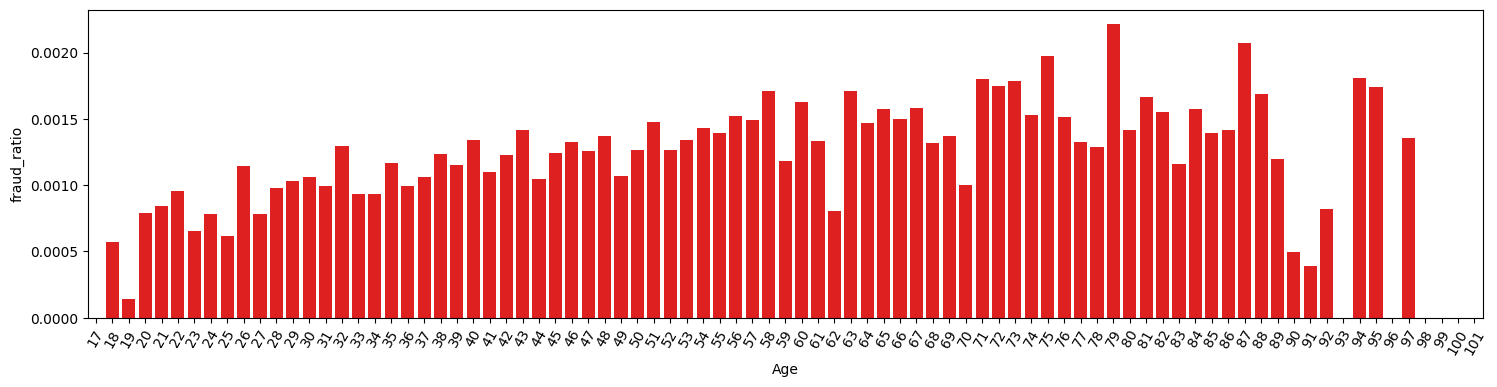

In [19]:
count_pd = fraud_ratio(trans_df, "Age")

plt.figure(figsize=(18, 4))
sns.barplot(data=count_pd, x="Age", y="fraud_ratio", color="red")
plt.xticks(rotation=60)
plt.savefig(f'log/age.png', dpi=300, bbox_inches='tight')
plt.show()

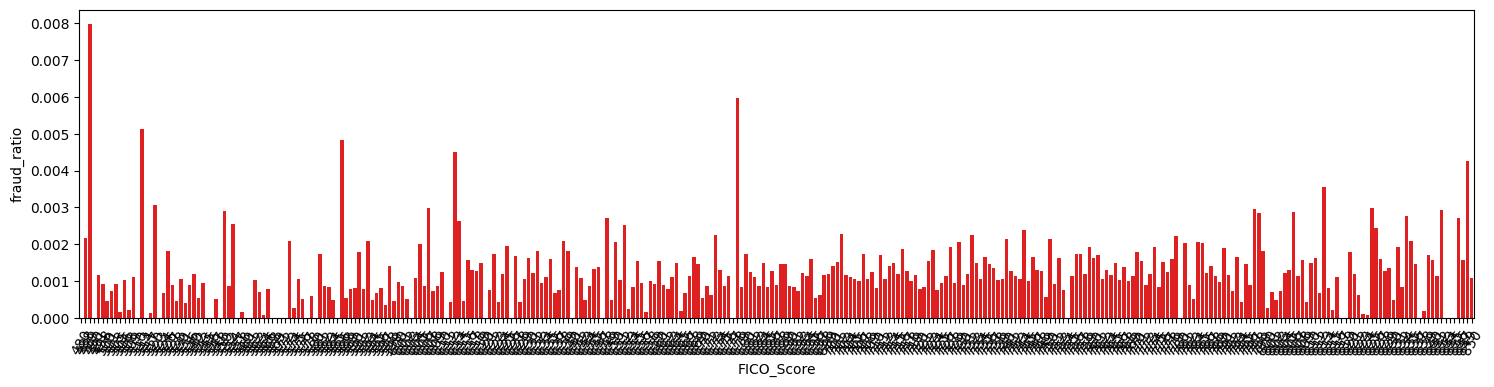

In [20]:
count_pd = fraud_ratio(trans_df, "FICO_Score")

plt.figure(figsize=(18, 4))
sns.barplot(data=count_pd, x="FICO_Score", y="fraud_ratio", color="red")
plt.xticks(rotation=60)
plt.savefig(f'log/fico.png', dpi=300, bbox_inches='tight')
plt.show()

In [ ]:
count_pd = fraud_ratio(trans_df, "Weekday")

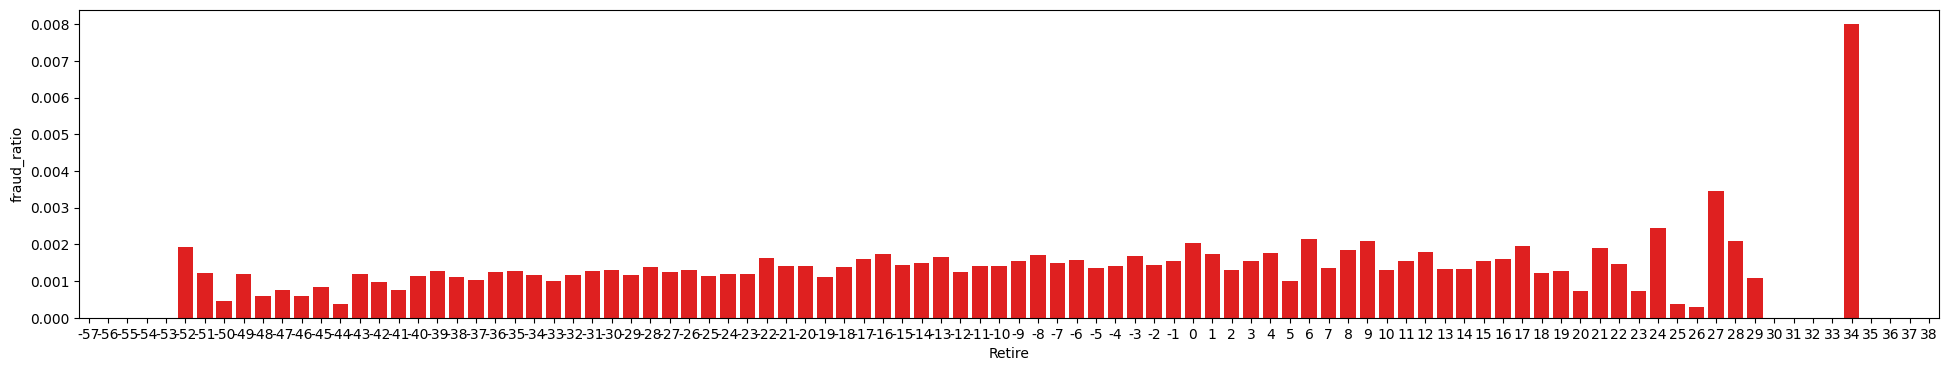

In [ ]:
df = df.with_columns([
    (
        (pl.col("Age") - pl.col("Retirement_Age"))
    )
    .alias("Retire"),
    
    pl.when((pl.col("Age") >= pl.col("Retirement_Age")))
      .then(pl.lit(1))
      .otherwise(pl.lit(0))
      .alias("Retire2")
])

fraud_ratio(df, "Retire", "retire", True)

In [5]:
df = df.filter(pl.col("Retire") == 34)
df["User"].value_counts()

User,count
i64,u32
983,2001


In [5]:
zip_df = pl.read_csv("data/georef-united-states-of-america-zc-point.csv")

zip_df.head(5)

Zip,Zip_City,Zip_State,latitude,longitude
i64,str,str,f64,f64
99503,"""Anchorage""","""AK""",61.90805,-156.85772
99613,"""King Salmon""","""AK""",58.98855,-155.56021
99701,"""Fairbanks""","""AK""",67.16977,-149.56917
99693,"""Whittier""","""AK""",61.38199,-148.52108
99729,"""Cantwell""","""AK""",63.18325,-148.50259


In [12]:
user_df = pl.read_csv("data/sd254_users.csv")

user_df.head(5)

Person,Current Age,Retirement Age,Birth Year,Birth Month,Gender,Address,Apartment,City,State,Zipcode,Latitude,Longitude,Per Capita Income - Zipcode,Yearly Income - Person,Total Debt,FICO Score,Num Credit Cards
str,i64,i64,i64,i64,str,str,i64,str,str,i64,f64,f64,str,str,str,i64,i64
"""Hazel Robinson""",53,66,1966,11,"""Female""","""462 Rose Lane""",null,"""La Verne""","""CA""",91750,34.15,-117.76,"""$29278""","""$59696""","""$127613""",787,5
"""Sasha Sadr""",53,68,1966,12,"""Female""","""3606 Federal Boulevard""",null,"""Little Neck""","""NY""",11363,40.76,-73.74,"""$37891""","""$77254""","""$191349""",701,5
"""Saanvi Lee""",81,67,1938,11,"""Female""","""766 Third Drive""",null,"""West Covina""","""CA""",91792,34.02,-117.89,"""$22681""","""$33483""","""$196""",698,5
"""Everlee Clark""",63,63,1957,1,"""Female""","""3 Madison Street""",null,"""New York""","""NY""",10069,40.71,-73.99,"""$163145""","""$249925""","""$202328""",722,4
"""Kyle Peterson""",43,70,1976,9,"""Male""","""9620 Valley Stream Drive""",null,"""San Francisco""","""CA""",94117,37.76,-122.44,"""$53797""","""$109687""","""$183855""",675,1


In [14]:

user_df = (
    user_df
    .join(zip_df, left_on=["Zipcode"], right_on=["Zip"], how="left")
)

user_df.head(10)


Person,Current Age,Retirement Age,Birth Year,Birth Month,Gender,Address,Apartment,City,State,Zipcode,Latitude,Longitude,Per Capita Income - Zipcode,Yearly Income - Person,Total Debt,FICO Score,Num Credit Cards,Zip_City,Zip_State,latitude,longitude
str,i64,i64,i64,i64,str,str,i64,str,str,i64,f64,f64,str,str,str,i64,i64,str,str,f64,f64
"""Hazel Robinson""",53,66,1966,11,"""Female""","""462 Rose Lane""",null,"""La Verne""","""CA""",91750,34.15,-117.76,"""$29278""","""$59696""","""$127613""",787,5,"""La Verne""","""CA""",34.16086,-117.77278
"""Sasha Sadr""",53,68,1966,12,"""Female""","""3606 Federal Boulevard""",null,"""Little Neck""","""NY""",11363,40.76,-73.74,"""$37891""","""$77254""","""$191349""",701,5,"""Little Neck""","""NY""",40.77268,-73.74671
"""Saanvi Lee""",81,67,1938,11,"""Female""","""766 Third Drive""",null,"""West Covina""","""CA""",91792,34.02,-117.89,"""$22681""","""$33483""","""$196""",698,5,"""West Covina""","""CA""",34.02584,-117.89993
"""Everlee Clark""",63,63,1957,1,"""Female""","""3 Madison Street""",null,"""New York""","""NY""",10069,40.71,-73.99,"""$163145""","""$249925""","""$202328""",722,4,"""New York""","""NY""",40.77555,-73.99035
"""Kyle Peterson""",43,70,1976,9,"""Male""","""9620 Valley Stream Drive""",null,"""San Francisco""","""CA""",94117,37.76,-122.44,"""$53797""","""$109687""","""$183855""",675,1,"""San Francisco""","""CA""",37.76975,-122.44823
"""Aldo Walker""",42,70,1977,10,"""Male""","""58 Birch Lane""",6,"""Davenport""","""IA""",52803,41.55,-90.6,"""$20599""","""$41997""","""$0""",704,3,"""Davenport""","""IA""",41.53865,-90.55607
"""Katalina Lewis""",36,67,1983,12,"""Female""","""5695 Fifth Street""",1,"""Louisville""","""KY""",40299,38.22,-85.74,"""$25258""","""$51500""","""$102286""",672,3,"""Louisville""","""KY""",38.16266,-85.51677
"""Ryland Howard""",26,67,1993,12,"""Male""","""1941 Ninth Street""",10,"""Portland""","""OR""",97214,45.51,-122.64,"""$26790""","""$54623""","""$114711""",728,1,"""Portland""","""OR""",45.5143,-122.64309
"""Kenya Cooper""",81,66,1938,7,"""Female""","""11 Spruce Avenue""",null,"""Telford""","""PA""",18969,40.32,-75.32,"""$26273""","""$42509""","""$2895""",755,5,"""Telford""","""PA""",40.32631,-75.37272


In [ ]:
user_zips = user_df.select(pl.col("Zipcode").unique())

all_zips = zip_df.select(pl.col("Zip").unique())

all_in = (
    user_zips
    .select(
        (pl.col("Zipcode").is_in(all_zips["Zip"])).all().alias("all_in_zip_df")
    )
    .item()
)

if all_in:
    print("user_df의 zipcode 값들이 모두 zip_df의 zip 컬럼에 포함됩니다.")
else:
    print("user_df의 zipcode 값 중 zip_df에 없는 항목이 존재합니다.")
    
missing_zips = user_zips.filter(
    ~pl.col("Zipcode").is_in(all_zips["Zip"])
)
print("zip_df에 없는 zipcode 목록:")
print(missing_zips)

user_df의 zipcode 값 중 zip_df에 없는 항목이 존재합니다.
zip_df에 없는 zipcode 목록:
shape: (16, 1)
┌─────────┐
│ Zipcode │
│ ---     │
│ i64     │
╞═════════╡
│ 29598   │
│ 31420   │
│ 32353   │
│ 33318   │
│ 35902   │
│ …       │
│ 93014   │
│ 93031   │
│ 94620   │
│ 94955   │
│ 95967   │
└─────────┘


In [ ]:
user_df = pl.read_csv("data/credit_card_transactions-ibm_v2.csv")
user_df = user_df.with_columns([
    pl.col("Zip").cast(pl.Int32)   
])

user_zips = user_df.select(pl.col("Zip").unique())

all_zips = zip_df.select(pl.col("Zip").unique())

all_in = (
    user_zips
    .select(
        (pl.col("Zip").is_in(all_zips["Zip"])).all().alias("all_in_zip_df")
    )
    .item()
)

if all_in:
    print("trans_df의 zipcode 값들이 모두 zip_df의 zip 컬럼에 포함됩니다.")
else:
    print("trans_df의 zipcode 값 중 zip_df에 없는 항목이 존재합니다.")
    
missing_zips = user_zips.filter(
    ~pl.col("Zip").is_in(all_zips["Zip"])
)
print("zip_df에 없는 zipcode 목록:")
print(missing_zips)

trans_df의 zipcode 값 중 zip_df에 없는 항목이 존재합니다.
zip_df에 없는 zipcode 목록:
shape: (2_456, 1)
┌─────────┐
│ Zip     │
│ ---     │
│ f64     │
╞═════════╡
│ 501.0   │
│ 1041.0  │
│ 1061.0  │
│ 1090.0  │
│ 1101.0  │
│ …       │
│ 99708.0 │
│ 99710.0 │
│ 99802.0 │
│ 99803.0 │
│ 99928.0 │
└─────────┘
